# Customer Personality Analysis

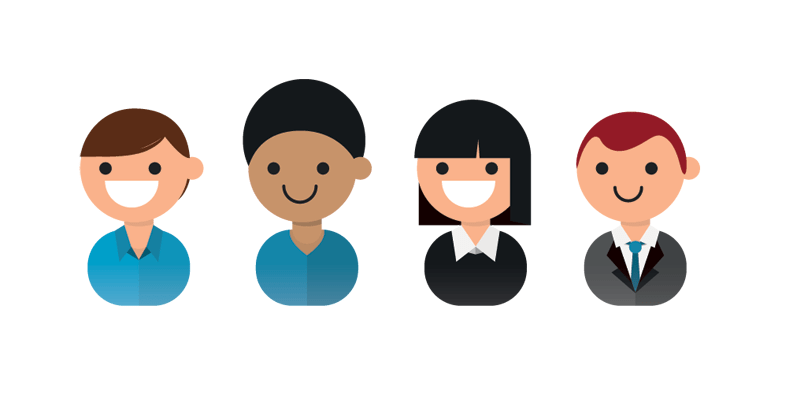

### Context

- Customer Personality Analysis is a detailed analysis of a company’s ideal stand towards its customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns.
- For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which segment is most likely to buy the product and then market the product only on that particular segment.

### Importing Libraries

In [1]:
# !pip install plotly
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
data_df = pd.read_csv("marketing_campaign.csv")

In [3]:
data_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,10023,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,10024,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,10025,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,10026,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,10027,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data_df.shape

(5336, 29)

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5336 non-null   int64  
 1   Year_Birth           5336 non-null   int64  
 2   Education            5336 non-null   object 
 3   Marital_Status       5336 non-null   object 
 4   Income               5273 non-null   float64
 5   Kidhome              5336 non-null   int64  
 6   Teenhome             5336 non-null   int64  
 7   Dt_Customer          5336 non-null   object 
 8   Recency              5336 non-null   int64  
 9   MntWines             5336 non-null   int64  
 10  MntFruits            5336 non-null   int64  
 11  MntMeatProducts      5336 non-null   int64  
 12  MntFishProducts      5336 non-null   int64  
 13  MntSweetProducts     5336 non-null   int64  
 14  MntGoldProds         5336 non-null   int64  
 15  NumDealsPurchases    5336 non-null   i

In [6]:
data_df.nunique()

ID                     5336
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [7]:
# Checking if any NaN is present in column or not

data_df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

## EDA

#### 1. Graduates make up the majority of customers.

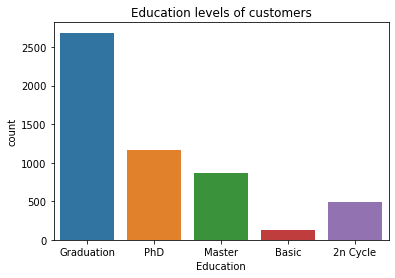

In [8]:
ax = sns.countplot(data = data_df, x = "Education")
ax.set(title = "Education levels of customers");

#### 2. We see that customers mostly live with a partner. This information can be useful when selling products.

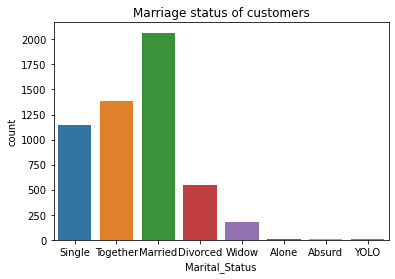

In [9]:
ax = sns.countplot(data = data_df, x = "Marital_Status")
ax.set(title = "Marriage status of customers");

#### 3. Most of the customers rejected the last offer.

Percentage of those who accepted =  14.898800599700149


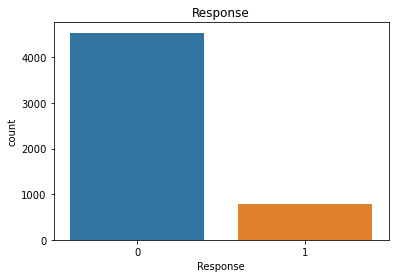

In [12]:
ax = sns.countplot(data = data_df, x = "Response")
ax.set(title = "Response")
print("Percentage of those who accepted = ",len(data_df[data_df["Response"]==1])/len(data_df["Response"])*100)

#### 4. About 89 percent of customers are at least undergraduate.
#### 5. About 35 percent of customers live alone.

In [13]:
# Adding a column "Age" in the dataframe

data_df['Age'] = 2022 - data_df["Year_Birth"]

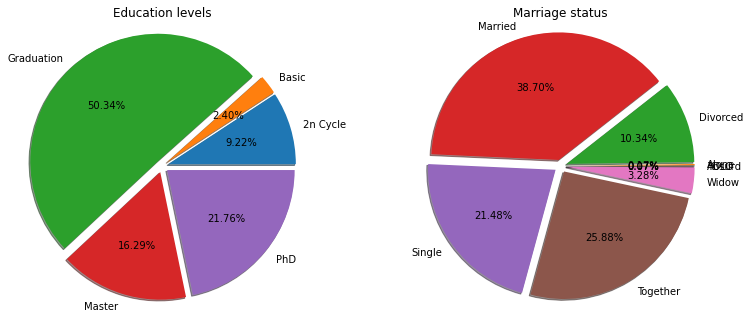

In [14]:
cat = data_df.groupby("Education").count()["Age"]
label = data_df.groupby("Education").count()["Age"].index
fig, ax = plt.subplots(1,2, figsize = (10, 12))
ax[0].pie(cat,labels = label, autopct='%.2f%%', shadow = True,radius = 2, explode = [0.1,0.1,0.1,0.1,0.1])
ax[0].set_title("Education levels", pad = 70)

cat = data_df.groupby("Marital_Status").count()["Age"]
label = data_df.groupby("Marital_Status").count()["Age"].index
ax[1].pie(cat, labels = label, autopct = '%.2f%%', shadow = True,radius = 2, explode = [0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1])
ax[1].set_title("Marriage status",pad = 70)
plt.subplots_adjust(wspace = 1.5, hspace =0)
plt.show()

#### 6. Most customers are between 40-60 years old.

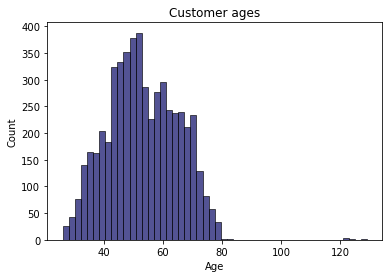

In [15]:
ax = sns.histplot(data = data_df,x = "Age",color = "midnightblue")
ax.set(xlabel = "Age", title = "Customer ages");

#### 7. Pair-plot for Age, Income, Expenses & Kids

In [16]:
data_df['Kids'] = data_df['Kidhome'] + data_df['Teenhome']
data_df['Expenses'] = data_df['MntWines'] + data_df['MntFruits'] + data_df['MntMeatProducts'] + data_df['MntFishProducts'] + data_df['MntSweetProducts'] + data_df['MntGoldProds']
data_df['NumTotalPurchases'] = data_df['NumWebPurchases'] + data_df['NumCatalogPurchases'] + data_df['NumStorePurchases'] + data_df['NumDealsPurchases']

<Figure size 1440x864 with 0 Axes>

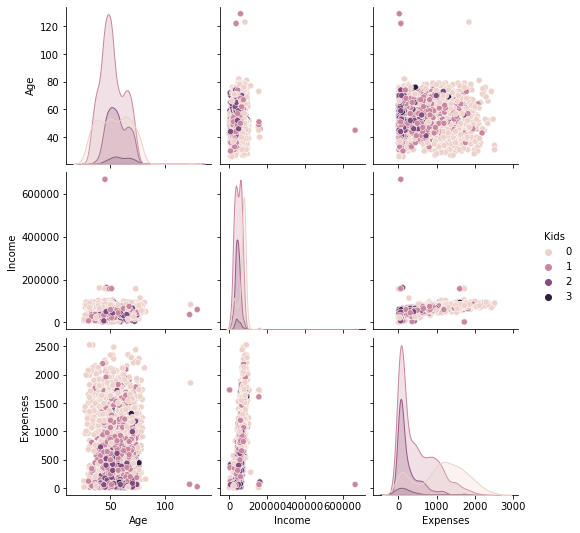

In [16]:
plot = ["Age","Income" , "Expenses","Kids"]
plt.figure(figsize = (20, 12));
sns.pairplot(data_df[plot],hue = "Kids")

#### 8. The plot below shows us that we can maybe select top 'n' loyal customers by :
- Expenses above 2000 
- Number of total purchases above 20

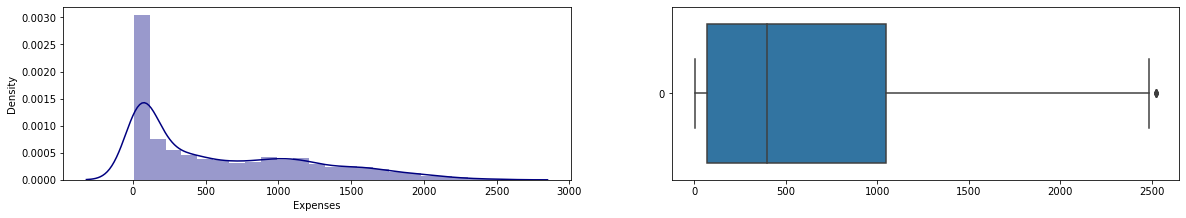

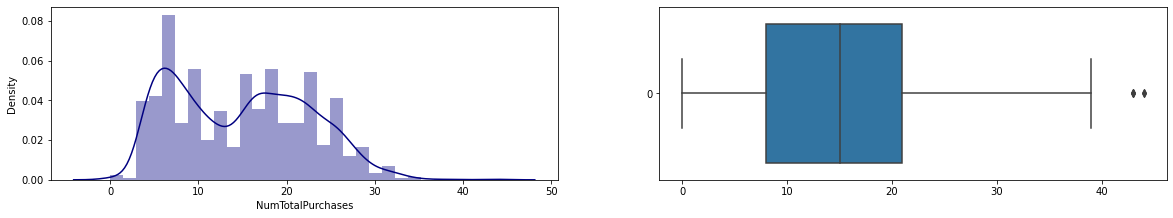

In [17]:
# Boxplot for total Expenses
plt.figure(figsize=(20,7))

plt.subplot(2,2,1)
sns.distplot(data_df['Expenses'],color='navy')

plt.subplot(2,2,2)
sns.boxplot(data = data_df["Expenses"], 
            orient="h")

# Boxplot for total purchases
plt.figure(figsize=(20,7))

plt.subplot(2,2,3)
sns.distplot(data_df['NumTotalPurchases'],color='navy')

plt.subplot(2,2,4)
sns.boxplot(data = data_df["NumTotalPurchases"], 
            orient="h");

## Data Preprocessing

In [18]:
# Dropping columns because they will not contribute anything in model building

data_df=data_df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)
data_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Kids,Expenses,NumTotalPurchases
0,10023,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,1,65,0,1617,25
1,10024,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,68,2,27,6
2,10025,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,57,0,776,21
3,10026,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,38,1,53,8
4,10027,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,41,1,422,19


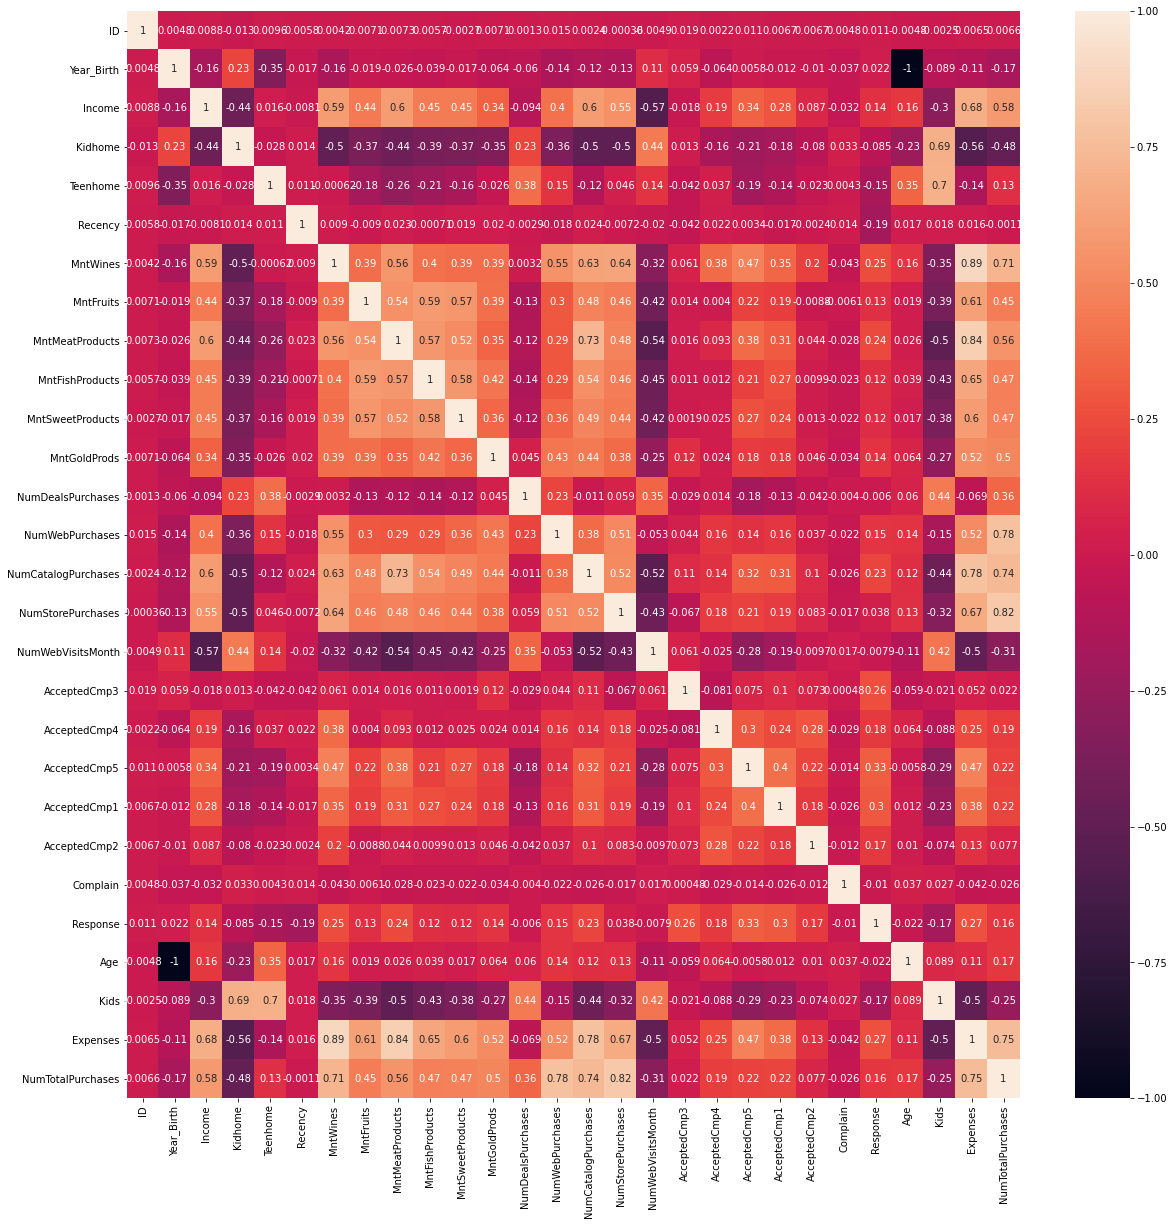

In [19]:
# Finding the correlation between the feature column

plt.figure(figsize=(20,20))
sns.heatmap(data_df.corr(), annot=True)
plt.show()

In [20]:
# Filling the missing value in the income my mean

data_df['Income'] = data_df['Income'].fillna(data_df['Income'].mean())
data_df.isna().any() 

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
Age                    False
Kids                   False
Expenses               False
NumTotalPurchases      False
dtype: bool

In [21]:
data_df['Marital_Status'].value_counts()  

Married     2065
Together    1381
Single      1146
Divorced     552
Widow        175
Alone          9
Absurd         4
YOLO           4
Name: Marital_Status, dtype: int64

In [22]:
data_df['Marital_Status'] = data_df['Marital_Status'].replace(['Married', 'Together'],'relationship')
data_df['Marital_Status'] = data_df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [23]:
# Count of different values present in Marital_Status

data_df['Marital_Status'].value_counts()  

relationship    3446
Single          1890
Name: Marital_Status, dtype: int64

In [24]:
# Combining different dataframe into a single column to reduce the number of dimension

data_df['TotalAcceptedCmp'] = data_df['AcceptedCmp1'] + data_df['AcceptedCmp2'] + data_df['AcceptedCmp3'] + data_df['AcceptedCmp4'] + data_df['AcceptedCmp5'] + data_df['Response']

In [25]:
# Deleting some column to reduce dimension and complexity of model

col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
data_df=data_df.drop(columns=col_del,axis=1)
data_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Age,Kids,Expenses,NumTotalPurchases,TotalAcceptedCmp
0,10023,1957,Graduation,Single,58138.0,2012-09-04,58,0,65,0,1617,25,1
1,10024,1954,Graduation,Single,46344.0,2014-03-08,38,0,68,2,27,6,0
2,10025,1965,Graduation,relationship,71613.0,2013-08-21,26,0,57,0,776,21,0
3,10026,1984,Graduation,relationship,26646.0,2014-02-10,26,0,38,1,53,8,0
4,10027,1981,PhD,relationship,58293.0,2014-01-19,94,0,41,1,422,19,0


In [26]:
data_df['Education'].value_counts()

Graduation    2686
PhD           1161
Master         869
2n Cycle       492
Basic          128
Name: Education, dtype: int64

In [27]:
# Changing category into UG and PG only

data_df['Education'] = data_df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
data_df['Education'] = data_df['Education'].replace(['Basic'], 'UG')

In [28]:
# Number of days a customer was engaged with company

# Changing Dt_customer into timestamp format
data_df['Dt_Customer'] = pd.to_datetime(data_df.Dt_Customer)
data_df['first_day'] = '01-01-2022'
data_df['first_day'] = pd.to_datetime(data_df.first_day)
data_df['day_engaged'] = (data_df['first_day'] - data_df['Dt_Customer']).dt.days

In [30]:
data_df=data_df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
data_df.shape

(5336, 9)

In [31]:
data_df.describe()

,Income,Age,Kids,Expenses,NumTotalPurchases,TotalAcceptedCmp,day_engaged
count,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000,5336.000000
mean,52307.627916,53.174663,0.947339,607.719078,14.886057,0.449588,3094.824400
std,24476.547485,11.945088,0.755883,603.186701,7.671986,0.893215,201.977315
min,1730.000000,26.000000,0.000000,5.000000,0.000000,0.000000,2743.000000
25%,35701.000000,45.000000,0.000000,69.000000,8.000000,0.000000,2922.000000
50%,51965.500000,52.000000,1.000000,400.000000,15.000000,0.000000,3095.000000
75%,68352.000000,63.000000,1.000000,1048.000000,21.000000,1.000000,3269.000000
max,666666.000000,129.000000,3.000000,2525.000000,44.000000,5.000000,3442.000000


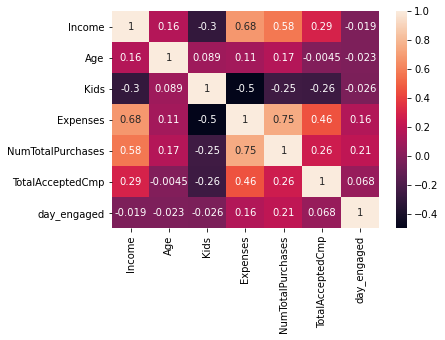

In [33]:
sns.heatmap(data_df.corr(), annot=True);

## Data Scaling & Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [36]:
cate = []
for i in data_df.columns:
    if (data_df[i].dtypes == "object"):
        cate.append(i)

print(cate)

['Education', 'Marital_Status']


In [37]:
data_df['Marital_Status'].value_counts()

relationship    3446
Single          1890
Name: Marital_Status, dtype: int64

In [38]:
lbl_encode = LabelEncoder()
for i in cate:
    data_df[i]=data_df[[i]].apply(lbl_encode.fit_transform)

In [39]:
scaled_features = StandardScaler().fit_transform(data_df.values)
scaled_features_df = pd.DataFrame(scaled_features, index=data_df.index, columns=data_df.columns)

In [40]:
scaled_features_df.head()

,Education,Marital_Status,Income,Age,Kids,Expenses,NumTotalPurchases,TotalAcceptedCmp,day_engaged
0,-0.156772,-1.350289,0.238225,0.990068,-1.253405,1.673405,1.318419,0.616273,1.540791
1,-0.156772,-1.350289,-0.243669,1.241240,1.392755,-0.962842,-1.158356,-0.503384,-1.182543
2,-0.156772,0.740582,0.788803,0.320274,-1.253405,0.279013,0.796993,-0.503384,-0.197191
3,-0.156772,0.740582,-1.048515,-1.270487,0.069675,-0.919734,-0.897643,-0.503384,-1.053803
4,-0.156772,0.740582,0.244558,-1.019315,0.069675,-0.307925,0.536279,-0.503384,-0.944870


In [41]:
scaled_features_df.isna().any()

Education            False
Marital_Status       False
Income               False
Age                  False
Kids                 False
Expenses             False
NumTotalPurchases    False
TotalAcceptedCmp     False
day_engaged          False
dtype: bool

## Model Building

## 1. Non Hierarchical Clustering (K-Means Clustering)

In [42]:
from sklearn.cluster import KMeans

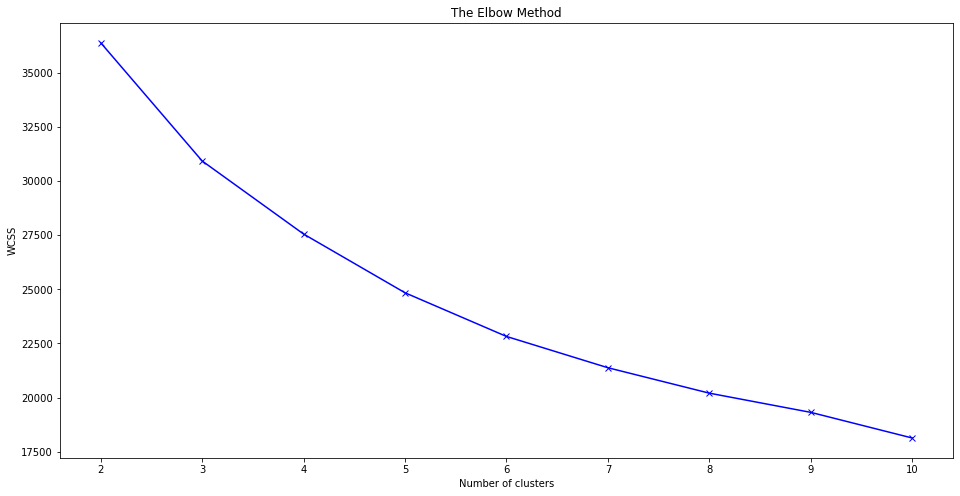

In [43]:
wcss=[]
for i in range (2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scaled_features_df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(2,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
from sklearn.metrics import silhouette_score 

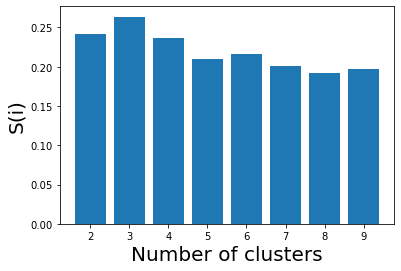

In [45]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df))) 
plt.bar(range(2,10), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

In [46]:
silhouette_scores

[0.24230680184952566,
 0.2636956399937114,
 0.23604175261198695,
 0.2104625317325934,
 0.2158373211648608,
 0.20040180635545324,
 0.1923621129172104,
 0.19654379981288536]

In [47]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.

sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  3


In [48]:
# Training a predicting using K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=42).fit(scaled_features_df)
pred=kmeans.predict(scaled_features_df)


# Appending those cluster value into main dataframe (without standard-scalar)

data_df['cluster'] = pred + 1

In [49]:
data_df.head()

,Education,Marital_Status,Income,Age,Kids,Expenses,NumTotalPurchases,TotalAcceptedCmp,day_engaged,cluster
0,0,0,58138.0,65,0,1617,25,1,3406,3
1,0,0,46344.0,68,2,27,6,0,2856,2
2,0,1,71613.0,57,0,776,21,0,3055,3
3,0,1,26646.0,38,1,53,8,0,2882,2
4,0,1,58293.0,41,1,422,19,0,2904,2


In [50]:
scaled_features_df.head()

,Education,Marital_Status,Income,Age,Kids,Expenses,NumTotalPurchases,TotalAcceptedCmp,day_engaged
0,-0.156772,-1.350289,0.238225,0.990068,-1.253405,1.673405,1.318419,0.616273,1.540791
1,-0.156772,-1.350289,-0.243669,1.241240,1.392755,-0.962842,-1.158356,-0.503384,-1.182543
2,-0.156772,0.740582,0.788803,0.320274,-1.253405,0.279013,0.796993,-0.503384,-0.197191
3,-0.156772,0.740582,-1.048515,-1.270487,0.069675,-0.919734,-0.897643,-0.503384,-1.053803
4,-0.156772,0.740582,0.244558,-1.019315,0.069675,-0.307925,0.536279,-0.503384,-0.944870


In [51]:
data_df['Education'].value_counts()

0    5208
1     128
Name: Education, dtype: int64

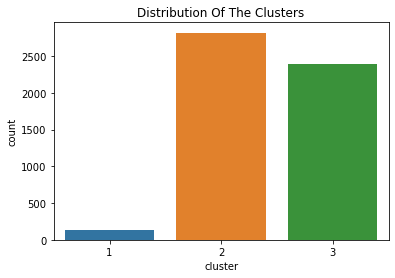

In [52]:
pl = sns.countplot(x=data_df["cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

### Clusters interpretation 

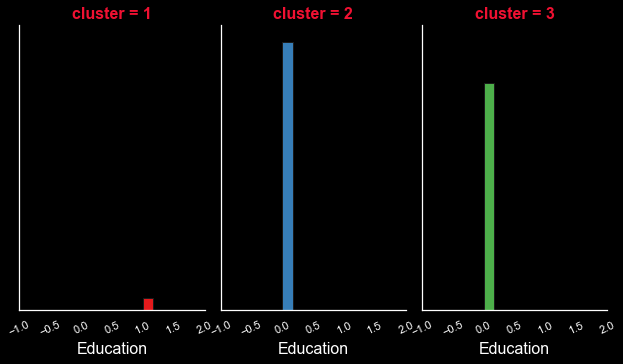

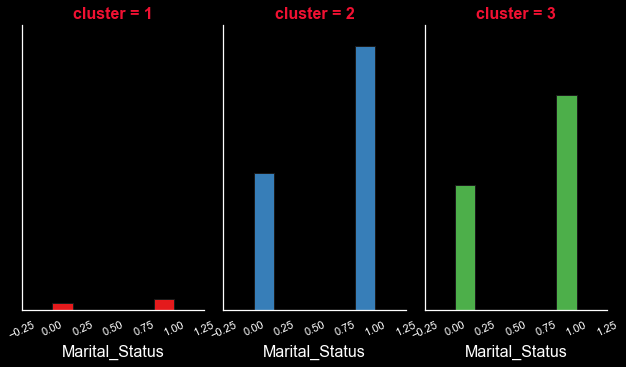

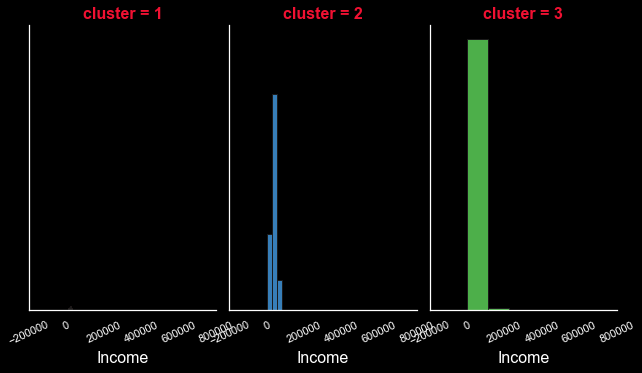

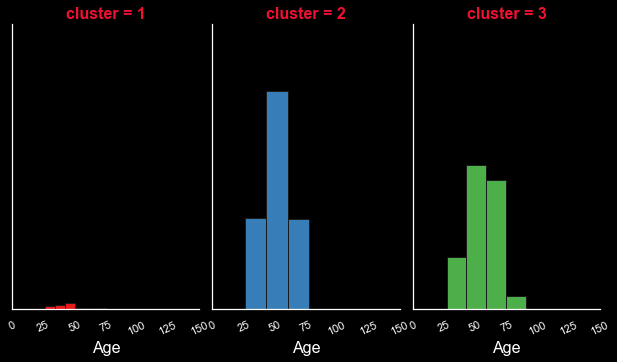

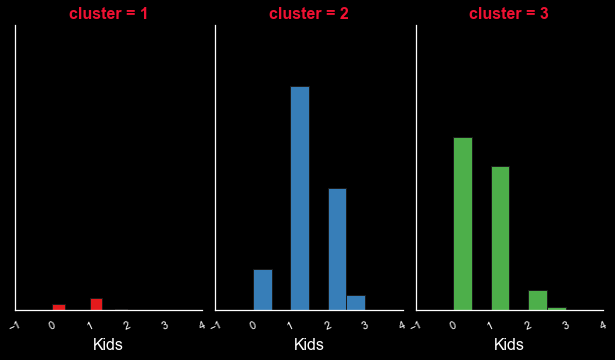

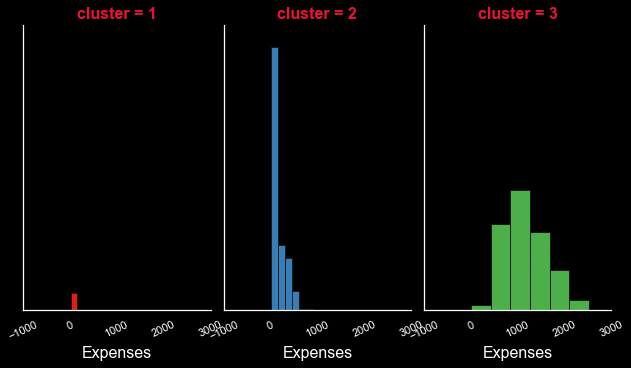

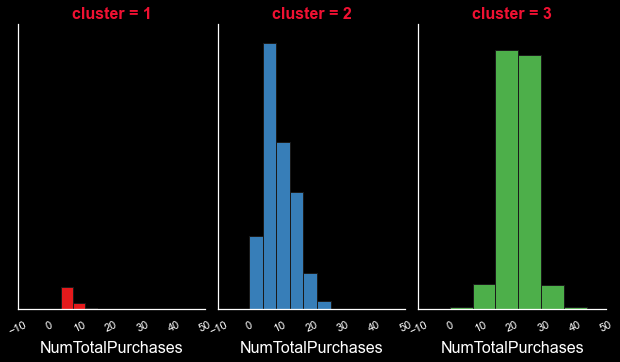

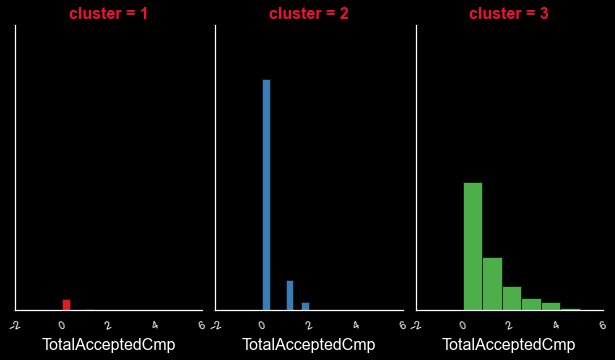

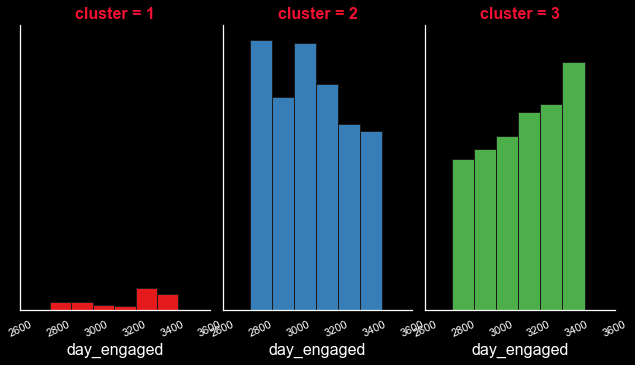

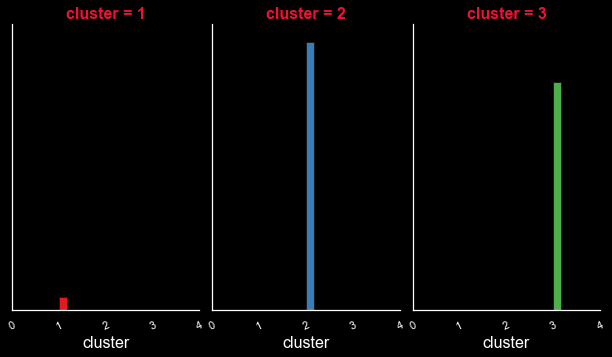

In [59]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in data_df:
    diag = sns.FacetGrid(data_df, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

### The clusters are:

- Cluster 1 is composed of people with low education levels, low income and younger age as well.
- Cluster 2 is composed of people with very high education levels, above average income, higher age and high expenses.
- Cluster 3 is composed of people with average age, average expenses but very high income. 

## 2. Heirarchichal Clustering

In [61]:
# Creating the model
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'axes.grid' : False})
import scipy.cluster.hierarchy as shc

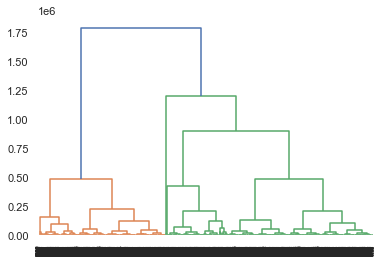

In [62]:
dend=shc.dendrogram(shc.linkage(data_df,method='ward'))

In [64]:
from sklearn.cluster import AgglomerativeClustering

In [65]:
clust=AgglomerativeClustering(n_clusters=3,linkage='ward',affinity='euclidean')

In [66]:
clust.fit_predict(data_df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
clust.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
data_df['Cluster_labels'] = clust.labels_
data_df.head()

,Education,Marital_Status,Income,Age,Kids,Expenses,NumTotalPurchases,TotalAcceptedCmp,day_engaged,cluster,Cluster_labels
0,0,0,58138.0,65,0,1617,25,1,3406,3,0
1,0,0,46344.0,68,2,27,6,0,2856,2,0
2,0,1,71613.0,57,0,776,21,0,3055,3,0
3,0,1,26646.0,38,1,53,8,0,2882,2,1
4,0,1,58293.0,41,1,422,19,0,2904,2,0


### Clusters Interpretation

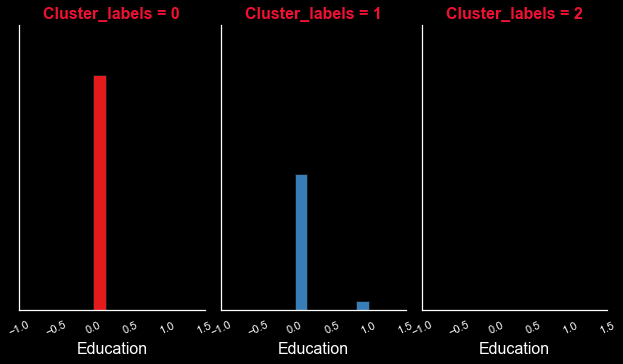

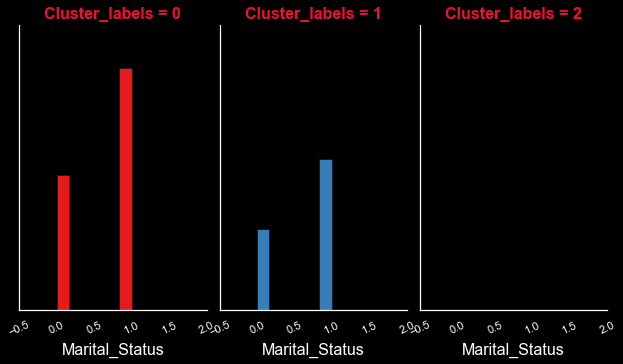

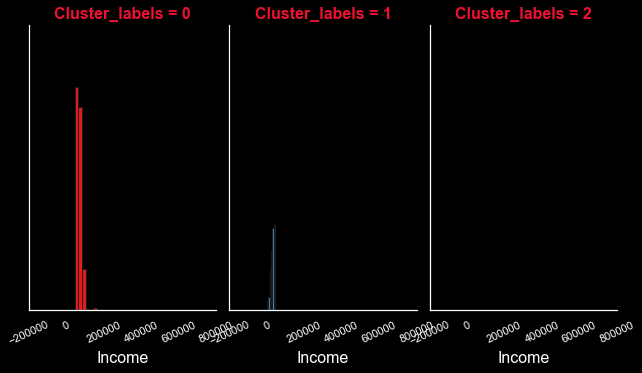

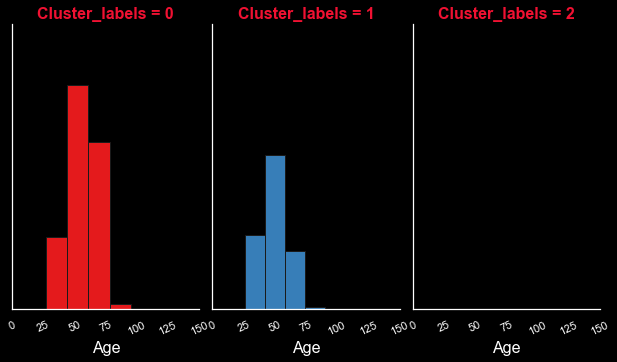

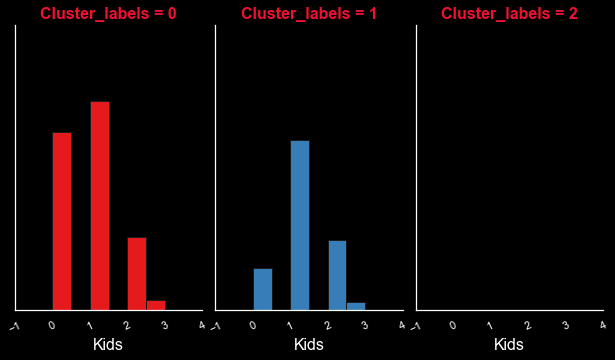

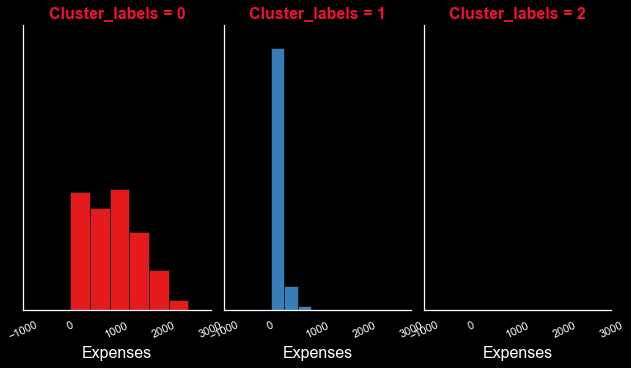

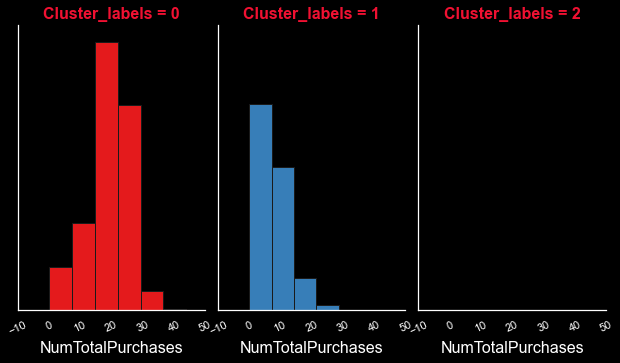

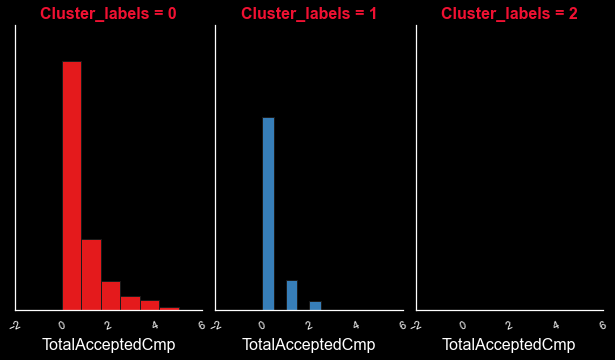

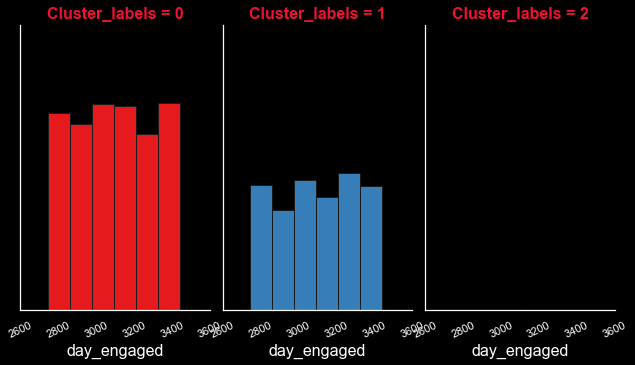

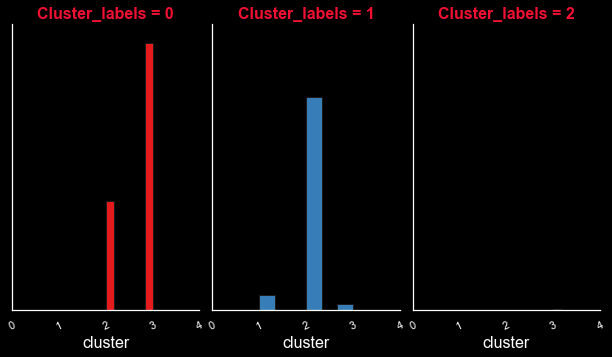

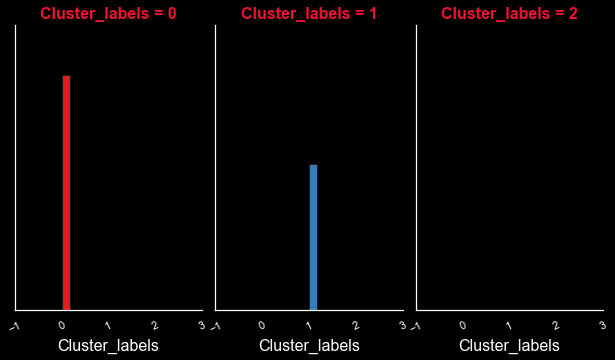

In [69]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
for i in data_df:
    diag = sns.FacetGrid(data_df, col = "Cluster_labels", hue = "Cluster_labels", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=16, color = 'white')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

#### The Clusters are:
- Cluster 0, people have high level of education with most people being married with higher income and older age
- Cluster 1, people have mid level of education with almost haf of people being married with lower mid level income and age group of 50s

## 3. DBSCAN

In [70]:
data_df = data_df.drop(columns=['cluster','Cluster_labels'],axis=1)

In [71]:
data_df

,Education,Marital_Status,Income,Age,Kids,Expenses,NumTotalPurchases,TotalAcceptedCmp,day_engaged
0,0,0,58138.0,65,0,1617,25,1,3406
1,0,0,46344.0,68,2,27,6,0,2856
2,0,1,71613.0,57,0,776,21,0,3055
3,0,1,26646.0,38,1,53,8,0,2882
4,0,1,58293.0,41,1,422,19,0,2904
...,...,...,...,...,...,...,...,...,...
5331,0,1,59868.0,50,1,1194,32,0,3085
5332,0,1,65695.0,62,1,656,21,0,2892
5333,0,0,64857.0,66,0,1540,23,0,3326
5334,0,1,45143.0,57,1,311,15,0,3050


In [72]:
X = data_df.drop(columns=['TotalAcceptedCmp'],axis=1).to_numpy()
y = data_df['TotalAcceptedCmp']

In [73]:
# clustering
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=500, min_samples=10).fit(X)

In [74]:
labels = clustering.labels_
sk_df = data_df.copy()

# Appending those cluster value into main dataframe (without standard-scalar)

sk_df['Assigned To'] = labels + 1

In [75]:
sk_df

,Education,Marital_Status,Income,Age,Kids,Expenses,NumTotalPurchases,TotalAcceptedCmp,day_engaged,Assigned To
0,0,0,58138.0,65,0,1617,25,1,3406,0
1,0,0,46344.0,68,2,27,6,0,2856,1
2,0,1,71613.0,57,0,776,21,0,3055,1
3,0,1,26646.0,38,1,53,8,0,2882,1
4,0,1,58293.0,41,1,422,19,0,2904,1
...,...,...,...,...,...,...,...,...,...,...
5331,0,1,59868.0,50,1,1194,32,0,3085,1
5332,0,1,65695.0,62,1,656,21,0,2892,1
5333,0,0,64857.0,66,0,1540,23,0,3326,1
5334,0,1,45143.0,57,1,311,15,0,3050,1


### Interpretation of Clusters

In [76]:
sk_df.columns

Index(['Education', 'Marital_Status', 'Income', 'Age', 'Kids', 'Expenses',
       'NumTotalPurchases', 'TotalAcceptedCmp', 'day_engaged', 'Assigned To'],
      dtype='object')

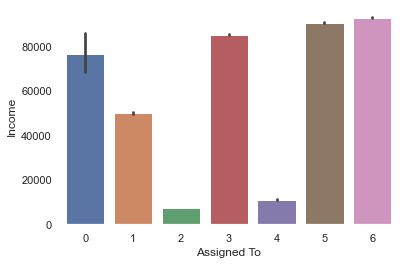

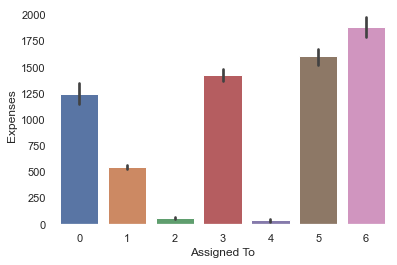

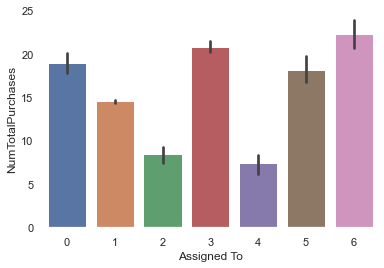

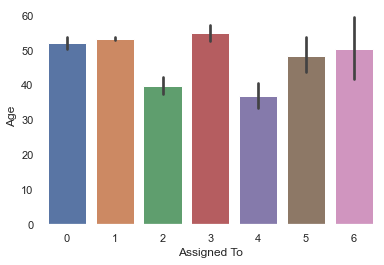

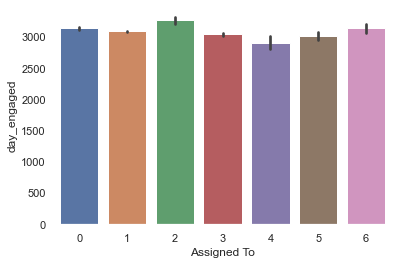

In [77]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'axes.grid' : True})

numerical_v = ['Income', 'Expenses', 'NumTotalPurchases', 'Age', 'day_engaged']

for i in numerical_v:
    plt.figure()
    sns.barplot(y=sk_df[i], x=sk_df['Assigned To'])
    plt.show()

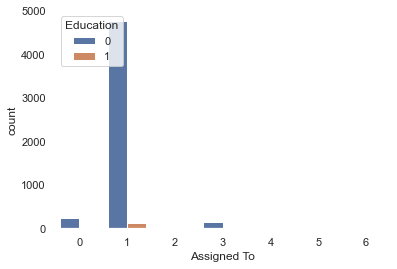

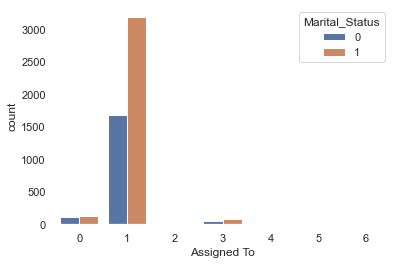

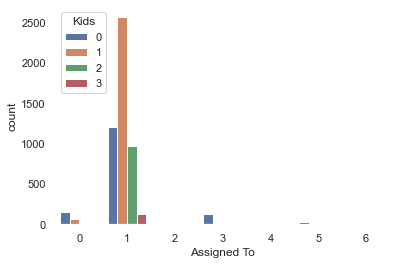

In [78]:
categorical_v = ['Education', 'Marital_Status', 'Kids']

for i in categorical_v:
    plt.figure()
    sns.countplot(x=sk_df['Assigned To'], data=sk_df, hue=sk_df[i])
    plt.show()

#### Summary from Data Visulization
- Cluster 0 outliers

- Cluster 1 : Low but moderate income, most likely to purchase with deals, most graduate and postgraduate education background, 2/3 of married, most have 1 or more child

- Cluster 2 : Low income, seldomly purchase but likely purchase with deals, mostly undergraduate education background

- Cluster 3 : Well above average income, over a half have no child

- Cluster 4 : Moderate to high income, Long time didn't purchase, over a half have no child

- Cluster 5 : High income, seldomly purchase deals, most postgraduate education background, most have no child, more likely to purchase on website rather than in store

- Cluster 6: High Income, High Purchases, High Expenses and most of them are close to 50 years of age.

- Cluster 3, 4, 5 are mostly enjoy purchasing in stores and websites, but less likely with deals. Cluster 1 and 2 purchase less frequently but love to purchase with deals.

## 4. Gaussian Mixture Model

In [79]:
num_data = data_df[numerical_v]
num_data

,Income,Expenses,NumTotalPurchases,Age,day_engaged
0,58138.0,1617,25,65,3406
1,46344.0,27,6,68,2856
2,71613.0,776,21,57,3055
3,26646.0,53,8,38,2882
4,58293.0,422,19,41,2904
...,...,...,...,...,...
5331,59868.0,1194,32,50,3085
5332,65695.0,656,21,62,2892
5333,64857.0,1540,23,66,3326
5334,45143.0,311,15,57,3050


In [80]:
from sklearn.preprocessing import normalize
norm_num_data = normalize(num_data,norm='l2')
norm_num_data_df = pd.DataFrame(norm_num_data, index=num_data.index, columns=num_data.columns)

In [81]:
from sklearn.mixture import GaussianMixture

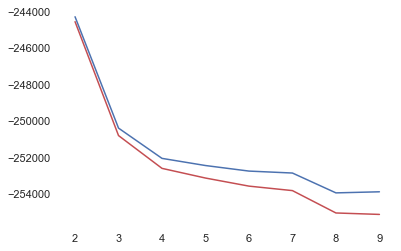

In [82]:
n_components=np.arange(2,10,1)

models=[GaussianMixture(n,n_init=5,max_iter=100, random_state=10) for n in n_components ]

aic_scores=[model.fit(norm_num_data_df).aic(norm_num_data_df) for model in models]

bic_scores=[model.fit(norm_num_data_df).bic(norm_num_data_df) for model in models]

plt.plot(n_components,aic_scores,c='r');
plt.plot(n_components,bic_scores,c='b');

In [83]:
model=GaussianMixture(4,n_init=5,max_iter=100, random_state=10)
model.fit(norm_num_data_df)
prediction = model.predict(norm_num_data_df)

In [84]:
norm_num_data_df['Cluster'] = prediction

In [85]:
norm_num_data_df

,Income,Expenses,NumTotalPurchases,Age,day_engaged,Cluster
0,0.997903,0.027755,0.000429,0.001116,0.058462,0
1,0.998105,0.000581,0.000129,0.001465,0.061509,3
2,0.999032,0.010826,0.000293,0.000795,0.042619,0
3,0.994199,0.001978,0.000298,0.001418,0.107531,3
4,0.998735,0.007230,0.000326,0.000702,0.049754,0
...,...,...,...,...,...,...
5331,0.998476,0.019913,0.000534,0.000834,0.051452,0
5332,0.998982,0.009975,0.000319,0.000943,0.043977,0
5333,0.998406,0.023707,0.000354,0.001016,0.051200,0
5334,0.997701,0.006873,0.000332,0.001260,0.067408,0


### Interpretation of Clusters

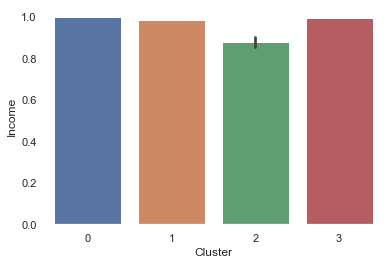

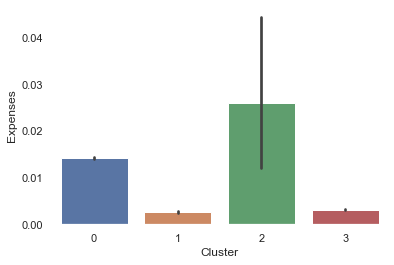

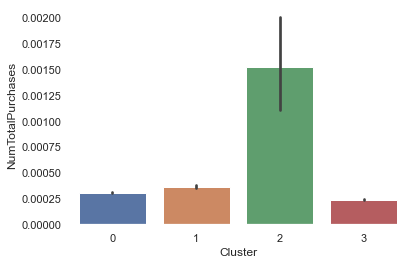

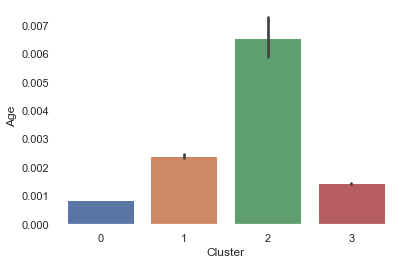

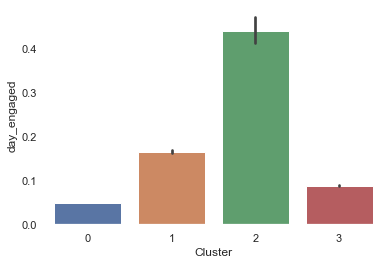

In [86]:
for i in numerical_v:
    plt.figure()
    sns.barplot(y=norm_num_data_df[i], x=norm_num_data_df['Cluster'])
    plt.show()

### The clusters are:

- Cluster 0 is composed of new customers with high income and less expenses
- Cluster 1 is composed of fairly old customers with high income and less expenses
- Cluster 2 is composed of very old customers with high income and average expenses
- Cluster 3 is composed of new customers with high income and small expenses